### Attendance Problem

Lets see how we can use bayes to solve an actual problem

*I have a list of 7 events with attendance and registered people for each event, Can we guess what will be the attendance of the event given that the number of people registered are 100?*

so given the data of the 7 events we want to predict how many people will attend the 8th event given that there are 100 registrations.

In [160]:
%matplotlib inline

from thinkbayes2 import Suite
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom, beta
import thinkplot

In [156]:
# import the dataset
data = pd.read_csv('attendance.csv', index_col='Event')

So, lets think about the problem for a bit, how would you approach it ?

In [155]:
class AttendanceModel(Suite):
    def Likelihood(self, data, hypo):
        ## define the method
        return 1

Try not to look at the data while developing the prior. I am using a beta prior, the beta prior has two params alpha(a) and beta(b) which are known as the shape parameters of the prior.


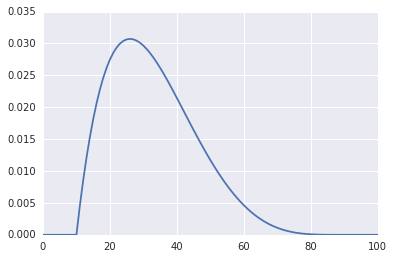

In [163]:
# Play around a bit with the beta distribution

plt.plot(beta.pdf(range(101), a=2, b=5, loc=10, scale=80))

My beleif is that atleast 20% of the registered people would attend the event. I am representing it by 

        beta.pdf(range(101), a=2, b=5, loc=20, scale=100)

notice the loc, and scale params are somewhat defining the range of my belief, and the alpha beta are actually choosen 
by looking at the picture from the wikipedia page depicting how the distribution looks like for different alpha, beta params.
        
        https://en.wikipedia.org/wiki/File:Beta_distribution_pdf.svg
 

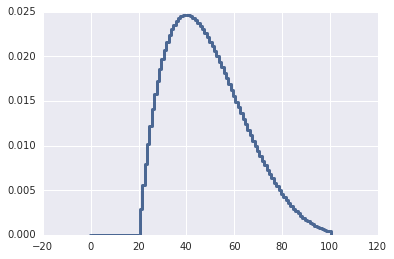

In [167]:
attendance = AttendanceModel(range(101))
# Feel free to change this to represent your own belief. 
prior = beta.pdf(range(101), a=2, b=5, loc=20, scale=100)
for index in range(101):
    attendance[index] = prior[index]
attendance.Normalize()
thinkplot.Pmf(attendance)

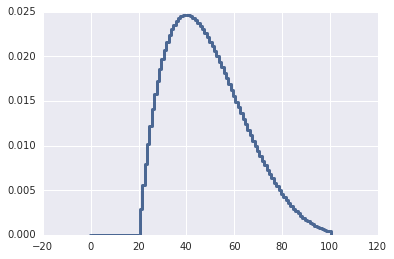

In [173]:
for attended, registered in zip(data.attended.tolist(), data.registered.tolist()):
    attendance.UpdateSet([1] * attended + [0] * (registered - attended))
attendance.Normalize()
thinkplot.Pmf(attendance)

In [174]:
# Discribe the posterior


By now, you should have an approximate on what percentage of people will turn up.

To predict the number of people who show up for the next event, we can generate a predictive distribution by drawing samples from the posterior that we just calculated, and then drawing samples from a Binomial distribution with parameters x and n, where n is the number of people who signed up and x is the probability of them showing up.

In [175]:
number_of_registered = 100
p = attendance.Sample(10000).mean() / 100

In [176]:
predictive_prior = binom(number_of_registered, p)

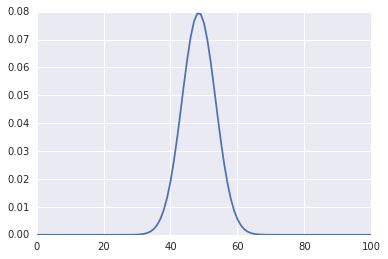

In [177]:
plt.plot(predictive_prior.pmf(range(101)))

I used the binom method from scipy.stats the way to get descriptors is slightly different but not much

1. predictive_prior.mean()
2. predictive_prior.interval(.90)

In [179]:
'There will be around {0} to {1} people attending the event.'.format(*predictive_prior.interval(0.95))

'There will be around 39.0 to 58.0 people attending the event.'

### Solving the same problem in the frequentist paradigm, how should we approach ? 

Lets do a simple regression to compare our results and see the differences in the insights gained from the result.

In [180]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

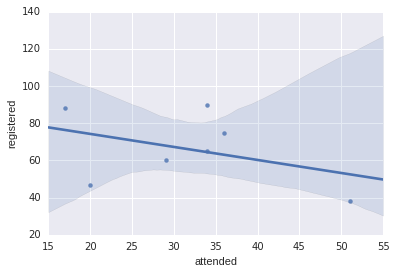

In [181]:
sns.regplot(data.attended, data.registered)

In [183]:
reg = LinearRegression()
reg.fit(X=data.registered.values.reshape(7,1), y=data.attended.values.reshape(7,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
reg.predict(100)

array([[ 23.79428044]])

Q1. By how much does the predictions differ ? 

Q2. If you had to bet on the result, which one would you bet the range that we got above or the result from regression ?